In [1]:
# %load_ext autoreload
# %autoreload 2

# Experiments with EDLAE model

In [2]:
from pathlib import Path
import numpy as np

import teaser.util as util
import teaser.evaluation as evaluation

from teaser.algorithm.baseline.edlae import EDLAE

## Datasets

In [3]:
## Uncomment corresponding directory.
# DATA_DIR = Path('../../data/ML20M/')
DATA_DIR = Path('../../data/Amazon Video Games/')
# DATA_DIR = Path('../../data/Publiq/')

In [4]:
# Shouldn't need to change this info
INTERACTIONS_TRAIN_PATH = DATA_DIR / 'interactions.train.csv'
INTERACTIONS_VALIN_PATH = DATA_DIR / 'interactions.valin.csv'
INTERACTIONS_VALOUT_PATH = DATA_DIR / 'interactions.valout.csv'
INTERACTIONS_TESTIN_PATH = DATA_DIR / 'interactions.testin.csv'
INTERACTIONS_TESTOUT_PATH = DATA_DIR / 'interactions.testout.csv'

METADATA_PATH = DATA_DIR / 'features.csv'

ITEM_ID = 'itemId'
USER_ID = 'userId'

## Define algorithm and hyperparameter ranges

In [5]:
ALG = EDLAE

# L2 = [10 ** p for p in range(2, 6)]
L2 = [10, 50, 100, 200, 400]
RHO = [10, 100]
MAX_ITER = 15
HYPERPARAMS = {'l2': L2, 'rho': RHO, 'max_iterations': MAX_ITER}
HYPERPARAMS

{'l2': [10, 50, 100, 200, 400], 'rho': [10, 100], 'max_iterations': 15}

## Parse data

In [6]:
S, tags = util.parse_metadata(METADATA_PATH, item_id=ITEM_ID)
n, t = S.shape  # amount of items and tags
HYPERPARAMS['t'] = t
del S

X = util.parse_interactions(INTERACTIONS_TRAIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

Xval_in = util.parse_interactions(INTERACTIONS_VALIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xval_out = util.parse_interactions(INTERACTIONS_VALOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_in = util.parse_interactions(INTERACTIONS_TESTIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_out = util.parse_interactions(INTERACTIONS_TESTOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

## Perform gridsearch on validation set

In [7]:
score, best_hyperparams = evaluation.gridsearch(ALG, X, None, Xval_in, Xval_out, HYPERPARAMS)

Training model EDLAE with hyperparameters {'l2': 10, 'rho': 10, 'max_iterations': 15, 't': 1688}


norm E 3.84192754867766
norm D 439.59849600892585
diag norm: 18.748880831279028
diag_diff: 18.748880831279028

norm E 3.3838453278177214
norm D 459.10588870175997
diag norm: 21.37570657334667
diag_diff: 20.619548105528743
rho * change E: 21.25023404388194

norm E 3.1873525083553833
norm D 463.9843198449055
diag norm: 19.910431530059306
diag_diff: 18.24967529190402
rho * change E: 8.217053066958508

norm E 3.079100262648324
norm D 466.20175824039103
diag norm: 18.652717967208197
diag_diff: 16.15714738405188
rho * change E: 4.88626999134113

norm E 3.004348351620064
norm D 467.46277219675295
diag norm: 17.70648272136664
diag_diff: 14.3912874838667
rho * change E: 3.422497165042378

norm E 2.953711857749705
norm D 468.26741373581734
diag norm: 17.017221118577922
diag_diff: 12.798515372055153
rho * change E: 2.5710436962738354

norm E 2.929683372389276
norm D 468.8431282253588
diag norm: 16.545400800247364
diag_diff: 11.296612951148926
rho * change E: 2.011500351379682

norm E 2.9334241636

norm E 1.9072548670534388
norm D 502.6198817701991
diag norm: 12.793209245539439
diag_diff: 12.793209245539439

norm E 1.874770958566552
norm D 520.2126140983315
diag norm: 14.445741401930936
diag_diff: 14.0283608616838
rho * change E: 7.974930421973945

norm E 1.822508567228129
norm D 523.8052729276676
diag norm: 14.03955622630133
diag_diff: 13.166032326803753
rho * change E: 2.7540035802672596

norm E 1.7760776381264243
norm D 525.3008663987573
diag norm: 13.562872649090936
diag_diff: 12.257521500771245
rho * change E: 1.5981207272267715

norm E 1.7345716066001962
norm D 526.184451361625
diag norm: 13.12385519575969
diag_diff: 11.415939988924631
rho * change E: 1.1692625074577454

norm E 1.6976672660355032
norm D 526.8067770844556
diag norm: 12.738932507114315
diag_diff: 10.65415382996286
rho * change E: 0.9485746793158945

norm E 1.6649639104598344
norm D 527.2830270251508
diag norm: 12.407555191658021
diag_diff: 9.96444227169438
rho * change E: 0.8042681259098313

norm E 1.63624994

norm E 1.2800535099952428
norm D 523.174750563288
diag norm: 9.477256818872926
diag_diff: 9.47678820225636

norm E 1.2857638762724906
norm D 539.9612801044198
diag norm: 10.56505461846183
diag_diff: 10.336522003206872
rho * change E: 4.619412594356107

norm E 1.2644473619895806
norm D 543.1660787606447
diag norm: 10.400536395433067
diag_diff: 9.927466404041144
rho * change E: 1.5261535564225672

norm E 1.2425422912244315
norm D 544.394306474225
diag norm: 10.169967618035791
diag_diff: 9.459907342406446
rho * change E: 0.8570490741418684

norm E 1.2216343215574494
norm D 545.0694242457884
diag norm: 9.940269258298098
diag_diff: 9.004084489396668
rho * change E: 0.612471509690097

norm E 1.2020756206615943
norm D 545.5289043824949
diag norm: 9.724596539582437
diag_diff: 8.573074934026245
rho * change E: 0.49709247787868316

norm E 1.1839092693840083
norm D 545.8826149647931
diag norm: 9.526229858019704
diag_diff: 8.169720975290167
rho * change E: 0.4296972874485592

norm E 1.167060066046

norm E 0.8108497455227301
norm D 536.9782274933817
diag norm: 6.403337719225447
diag_diff: 6.402095657282805

norm E 0.8233627490301626
norm D 553.3003385718235
diag norm: 7.05656457721679
diag_diff: 6.9548080243015145
rho * change E: 2.533007007496743

norm E 0.816121282943307
norm D 556.2974025593242
diag norm: 7.006312833924795
diag_diff: 6.79800700897306
rho * change E: 0.8124792049146559

norm E 0.8074647836897648
norm D 557.3745860129558
diag norm: 6.913208293204987
diag_diff: 6.5998192544927825
rho * change E: 0.441354097910875

norm E 0.7987574924790571
norm D 557.9124915103552
diag norm: 6.814088002961296
diag_diff: 6.398428957796967
rho * change E: 0.301637323928253

norm E 0.7902903283805752
norm D 558.2435328212581
diag norm: 6.716193806369344
diag_diff: 6.201393905903942
rho * change E: 0.23622462657018228

norm E 0.7821383175389862
norm D 558.479155526027
diag norm: 6.6216315253199935
diag_diff: 6.010785864676879
rho * change E: 0.20089478584274936

norm E 0.7743233823831

norm E 0.48605079887731834
norm D 545.5122168650599
diag norm: 3.982148860234484
diag_diff: 3.9812321680162257

norm E 0.4957516041155463
norm D 561.5043109511852
diag norm: 4.344632564081286
diag_diff: 4.308027503993807
rho * change E: 1.3328990225135668

norm E 0.4937003795306688
norm D 564.4069274883984
diag norm: 4.335212168388593
diag_diff: 4.260463138597725
rho * change E: 0.4219871679524959

norm E 0.49072055447732643
norm D 565.4196619593606
diag norm: 4.30283562244026
diag_diff: 4.189975322530207
rho * change E: 0.2248139213639587

norm E 0.48757879291606704
norm D 565.8978566800021
diag norm: 4.265972228265477
diag_diff: 4.115528156287935
rho * change E: 0.14772824252833663

norm E 0.48443287714698474
norm D 566.1698840477757
diag norm: 4.2281813976805855
diag_diff: 4.040829338714853
rho * change E: 0.11036489176244897

norm E 0.4813280619330939
norm D 566.3463351003622
diag norm: 4.190516425293658
diag_diff: 3.9669816236673863
rho * change E: 0.0898604509294684

norm E 0.478

norm E 3.842388106154297
norm D 439.4301329473344
diag norm: 18.744933980009442
diag_diff: 14.613869073391017

norm E 2.7622109065263496
norm D 476.5973946083671
diag norm: 15.085101536181583
diag_diff: 7.223929086857353
rho * change E: 273.9073630989784

norm E 2.8870801119829426
norm D 482.81358736021554
diag norm: 14.530241015596681
diag_diff: 4.270647480534445
rho * change E: 68.37774153233272

norm E 3.026583248262762
norm D 484.76334976743436
diag norm: 14.3095958671752
diag_diff: 2.5982763742638357
rho * change E: 36.29459499124498

norm E 3.1153434485491083
norm D 485.6289483611168
diag norm: 14.230655941567385
diag_diff: 1.635210728012152
rho * change E: 22.53456387772654

norm E 3.169851609253463
norm D 486.09404103209425
diag norm: 14.218502248610806
diag_diff: 1.071813414766563
rho * change E: 15.374231093246125

norm E 3.2040008404547864
norm D 486.37524721700225
diag norm: 14.239297370134999
diag_diff: 0.7360451540610243
rho * change E: 11.282940357036644

norm E 3.226150

norm E 1.9057965333232958
norm D 502.7592518051079
diag norm: 12.802456954493369
diag_diff: 10.548412755389185

norm E 1.5787550609277792
norm D 531.2692534943711
diag norm: 11.856962128206515
diag_diff: 6.9652816887239695
rho * change E: 88.72088941599007

norm E 1.5455847625556935
norm D 536.922687240554
diag norm: 11.529094154409691
diag_diff: 4.707970029733257
rho * change E: 23.622896572218796

norm E 1.555728869877888
norm D 538.8694669707
diag norm: 11.391813360523914
diag_diff: 3.232831979993387
rho * change E: 11.649966615954414

norm E 1.5721522682009015
norm D 539.71555604375
diag norm: 11.330693423827753
diag_diff: 2.2529597287965983
rho * change E: 7.435247836125812

norm E 1.5864203671705017
norm D 540.1448246375674
diag norm: 11.306739722741998
diag_diff: 1.593874076883106
rho * change E: 5.162522918561194

norm E 1.5976085076458761
norm D 540.3893836678596
diag norm: 11.303044923403629
diag_diff: 1.1457613234151258
rho * change E: 3.7608600222939854

norm E 1.6062145781

norm E 1.279866462100665
norm D 523.0909400102463
diag norm: 9.474404892366872
diag_diff: 8.142127296292923

norm E 1.1298064030907353
norm D 546.4724530196607
diag norm: 9.07297665886389
diag_diff: 6.035963184140692
rho * change E: 48.46527500179578

norm E 1.0944428229528624
norm D 551.8135985826585
diag norm: 8.819965569871504
diag_diff: 4.422237424883297
rho * change E: 14.6823862332216

norm E 1.0843607028658384
norm D 553.8039378157171
diag norm: 8.69809805358422
diag_diff: 3.2568665926790947
rho * change E: 7.227133145269453

norm E 1.0852483878070813
norm D 554.7554189388127
diag norm: 8.636282819895692
diag_diff: 2.415901954973945
rho * change E: 4.423474150598547

norm E 1.0892040547044475
norm D 555.2615140321032
diag norm: 8.601930831889797
diag_diff: 1.8059107108144892
rho * change E: 3.1059272482577733

norm E 1.0933543514334365
norm D 555.5506851593483
diag norm: 8.581487263083181
diag_diff: 1.3609923909341424
rho * change E: 2.308475672008376

norm E 1.0969172819490545


norm E 0.8106085654203078
norm D 536.8431437019254
diag norm: 6.4067061316615215
diag_diff: 5.764600474043279

norm E 0.7528998927725912
norm D 556.0693301455217
diag norm: 6.309483951273511
diag_diff: 4.7507153541647344
rho * change E: 25.344182309328755

norm E 0.7306172155280669
norm D 560.7804333978868
diag norm: 6.141146763597815
diag_diff: 3.804716077281631
rho * change E: 8.424129742445299

norm E 0.716884855262154
norm D 562.7616931585685
diag norm: 6.035022719947456
diag_diff: 3.044595681491085
rho * change E: 4.7450598347942465

norm E 0.710011168376526
norm D 563.7702748113429
diag norm: 5.972897988617862
diag_diff: 2.437600212627849
rho * change E: 2.9592599716101966

norm E 0.7074628001209713
norm D 564.358779513443
diag norm: 5.936433901470287
diag_diff: 1.9548216909743736
rho * change E: 1.9830939726853638

norm E 0.7070638462420895
norm D 564.7348937486889
diag norm: 5.913748783266012
diag_diff: 1.5714522147283023
rho * change E: 1.4534982403205936

norm E 0.70753007126

norm E 0.48608745469691783
norm D 545.3400765582312
diag norm: 3.9820258866828055
diag_diff: 3.736024862641325

norm E 0.46802721760346
norm D 562.3197064246585
diag norm: 4.0203252098122935
diag_diff: 3.366450467048357
rho * change E: 13.054173102302558

norm E 0.45769161969122646
norm D 566.170235547659
diag norm: 3.9338468013297074
diag_diff: 2.9113737788233838
rho * change E: 4.35026252585694

norm E 0.44938487608480626
norm D 567.9353791647203
diag norm: 3.862712703464393
diag_diff: 2.5159598006290524
rho * change E: 2.660450295764012

norm E 0.4429692021662535
norm D 568.9689121186315
diag norm: 3.8096421815419585
diag_diff: 2.1754548915919867
rho * change E: 1.9129006618150333

norm E 0.4383416218727123
norm D 569.6254664724656
diag norm: 3.7717085481433386
diag_diff: 1.8807175994628091
rho * change E: 1.4240410154468082

norm E 0.43528334674085717
norm D 570.0628899014775
diag norm: 3.7453384755927948
diag_diff: 1.625286406815297
rho * change E: 1.065311334619026

norm E 0.4334

In [8]:
f"Best score of {score} achieved with {best_hyperparams}."

"Best score of 0.13616651955615303 achieved with {'l2': 400, 'rho': 10, 'max_iterations': 15, 't': 1688}."

## Evaluate model with optimal hyperparams on test set

In [9]:
%%time
alg = ALG(**best_hyperparams)
alg.fit(X)

norm E 0.4856478684493251
norm D 545.4696014154504
diag norm: 3.98191853812865
diag_diff: 3.9808439999045846

norm E 0.49537798109238257
norm D 561.5407365195593
diag norm: 4.344610956174975
diag_diff: 4.307832404113682
rho * change E: 1.3332226810520862

norm E 0.4933321850980847
norm D 564.4532023057629
diag norm: 4.3353251526886725
diag_diff: 4.260384977134276
rho * change E: 0.4220132945050261

norm E 0.4903555109284553
norm D 565.466064525572
diag norm: 4.303005394150981
diag_diff: 4.189949604456543
rho * change E: 0.22498678173842587

norm E 0.4872149554187904
norm D 565.9418250579151
diag norm: 4.266167968283268
diag_diff: 4.115527662375659
rho * change E: 0.147824309630969

norm E 0.4840692525028076
norm D 566.2105555673245
diag norm: 4.2283905191983395
diag_diff: 4.040839729613781
rho * change E: 0.1102273943326476

norm E 0.4809644350850785
norm D 566.3837190933451
diag norm: 4.19073471564596
diag_diff: 3.9670001313801837
rho * change E: 0.08952331502493796

norm E 0.47791631

In [10]:
print("Performance on test set")
score = evaluation.eval(alg, Xtest_in, Xtest_out)

Performance on test set
Evaluating with 2000 users
Average Recall@20 0.209
Average Recall@100 0.372
Average nDCG@100 0.143


## Plot amount of items from long tail recommended

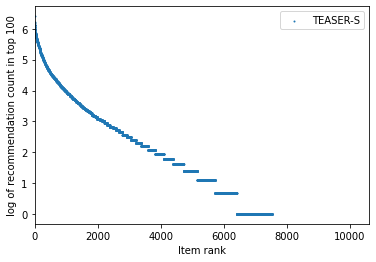

In [11]:
# evaluation.plot_long_tail(alg, Xtest_in=Xtest_in, Xtest_out=Xtest_out, labels=["EASE", "Test items"], k=100)
evaluation.plot_long_tail(alg, histories=Xtest_in, labels=["EDLAE"], k=100)